# Loading in the data & packages

In [18]:
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  #  PLOTTING
from scipy import stats
sns.set(style="darkgrid") # seaborn style
from statsmodels.graphics.mosaicplot import mosaic

In [19]:
flight_base = pd.read_csv("https://raw.githubusercontent.com/itsAmeMario0o/BDA718-PROJECT/master/Data/finalprojectIST718v3.csv", sep=',', error_bad_lines=False)

In [20]:
flight1 = flight_base.copy()
np.shape(flight1)

(129889, 28)

In [21]:
flight1.head()

,Satisfaction,Airline_Status,Age,Gender,Price_Sensitivity,Year_of_First_Flight,No_of_Flights_perAir,%_of_Flight_with_other_Airlines,Type_of_Travel,No._of_other_Loyalty_Cards,Shopping_Amount_at_Airport,Eating_and_Drinking_at_Airport,Class,Day_of_Month,Flight_date,Airline_Code,Airline_Name,Orgin_City,Origin_State,Destination_City,Destination_State,Scheduled_Departure_Hour,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Flight_cancelled,Flight_time_in_minutes,Flight_Distance,Arrival_Delay_greater_5_Mins
0,4.5,Blue,31,Male,1,2007,28,7,Business travel,2,0,75,Business,18,3/18/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,15,0.0,3.0,No,134.0,821,no
1,4.0,Blue,56,Male,2,2006,41,3,Business travel,0,15,60,Business,11,1/11/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,2.0,5.0,No,120.0,821,no
2,2.5,Blue,21,Female,2,2006,8,7,Personal Travel,0,0,135,Business,25,1/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,34.0,14.0,No,122.0,853,yes
3,4.0,Blue,43,Male,1,2007,9,9,Business travel,2,10,45,Eco,20,2/20/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,26.0,39.0,No,141.0,821,yes
4,5.0,Silver,49,Male,1,2006,14,10,Business travel,0,8,26,Eco,25,2/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,0.0,0.0,No,144.0,853,no


# EDA

<function matplotlib.pyplot.show>

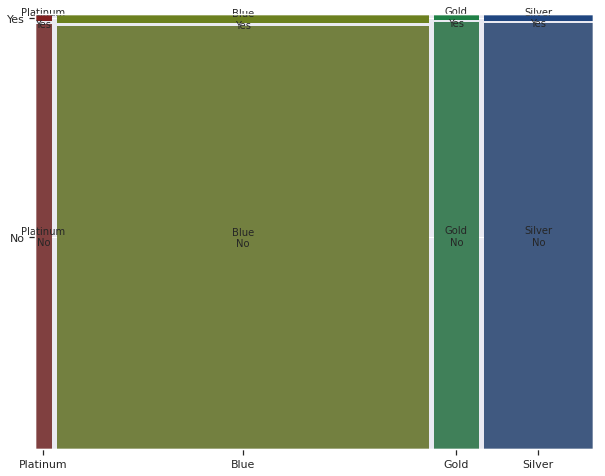

In [22]:
# https://stackoverflow.com/questions/52274643/figsize-in-matplotlib-is-not-changing-the-figure-size
# Mosaic plot 
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['font.size'] = 12.0
mosaic(flight1.sort_values('Satisfaction'), ['Airline_Status','Flight_cancelled'], axes_label=True, gap=0.009)
plt.show

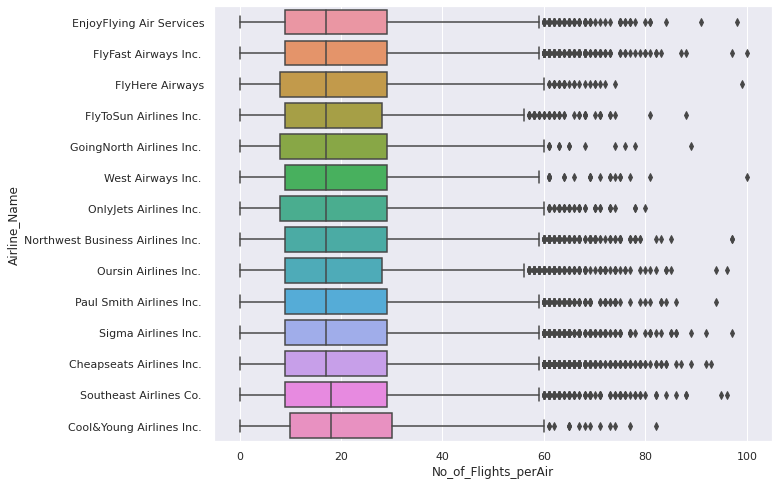

In [23]:
sns.boxplot(y=flight1["Airline_Name"], x=flight1["No_of_Flights_perAir"], data=flight1);
plt.rcParams['figure.figsize']=(10,8)
plt.show()

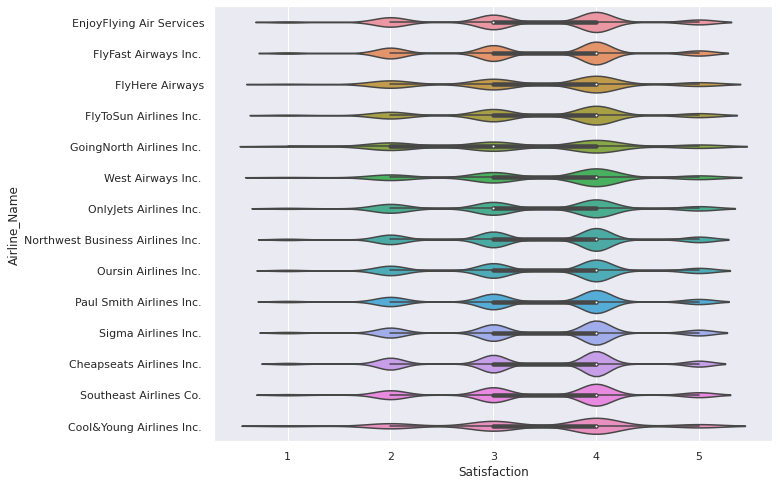

In [24]:
sns.violinplot(y=flight1["Airline_Name"], x=flight1["Satisfaction"], data=flight1);
plt.rcParams['figure.figsize']=(10,8)
plt.show()

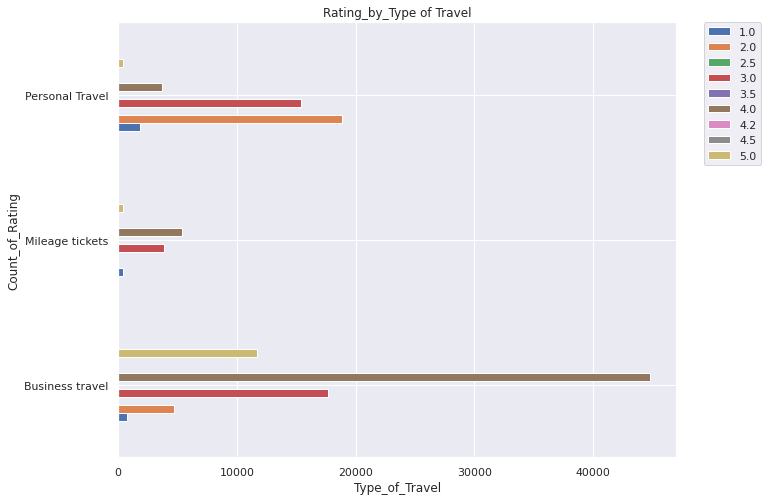

In [25]:
pd.crosstab(flight1['Type_of_Travel'], flight1.Satisfaction).plot(kind='barh')
plt.title('Rating_by_Type of Travel')
plt.xlabel('Type_of_Travel')
plt.ylabel('Count_of_Rating')
plt.rcParams['figure.figsize']=(10,8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

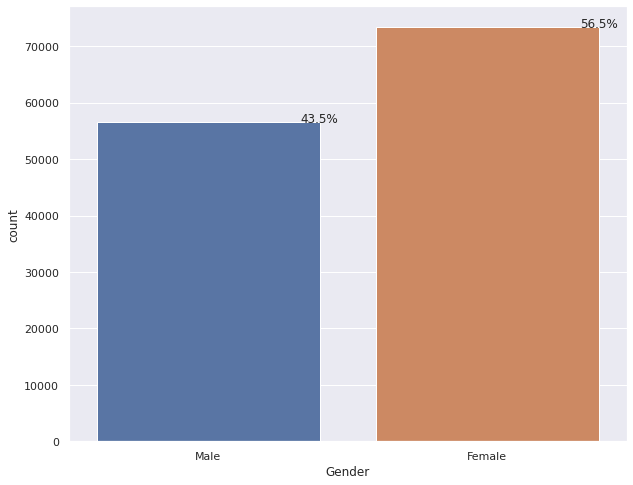

In [26]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
ax = sns.countplot(x = 'Gender', data = flight1) # for Seaborn version 0.7 and more
total = float(len(flight1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

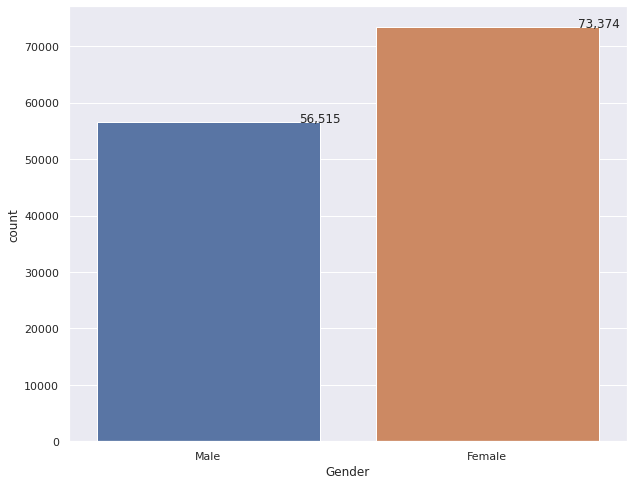

In [27]:
ax = sns.countplot(x = 'Gender', data = flight1) # for Seaborn version 0.7 and more
total = float(len(flight1))
for p in ax.patches:
    count = '{:,.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(count, (x, y),ha='center')
plt.show()

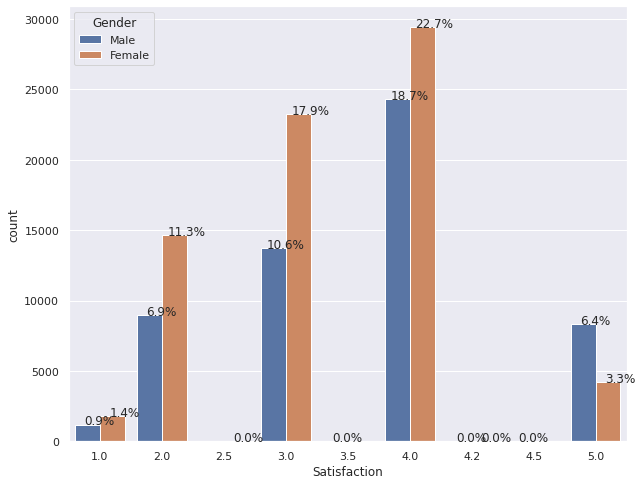

In [28]:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
from matplotlib.pyplot import show
ax = sns.countplot(x = 'Satisfaction', hue = 'Gender', data = flight1) # for Seaborn version 0.7 and more
total = float(len(flight1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

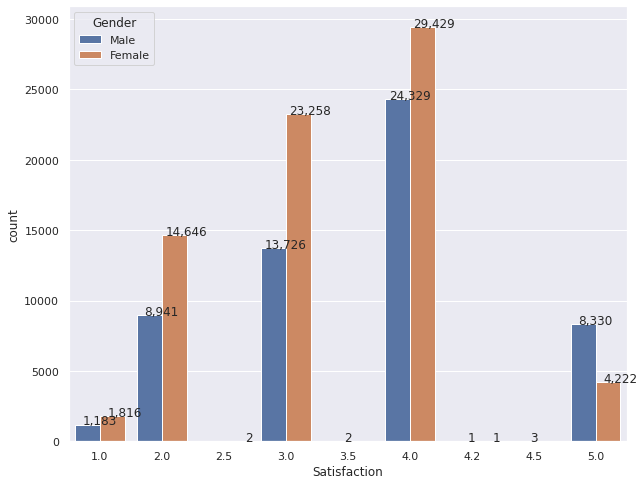

In [29]:
ax = sns.countplot(x = 'Satisfaction', hue = 'Gender', data = flight1) # for Seaborn version 0.7 and more
total = float(len(flight1))
for p in ax.patches:
    count = '{:,.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(count, (x, y),ha='center')
plt.show()

In [30]:
flight_female = flight1.copy()
flight_male = flight1.copy()
flight_female = flight_female[flight_female['Gender'].isin(['Female'])]
flight_male = flight_male[flight_male['Gender'].isin(['Male'])]

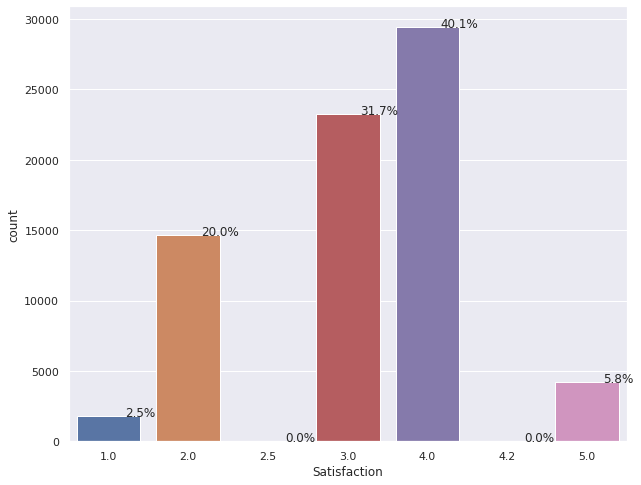

In [31]:
ax = sns.countplot(x = 'Satisfaction', data = flight_female) # for Seaborn version 0.7 and more
total = float(len(flight_female))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

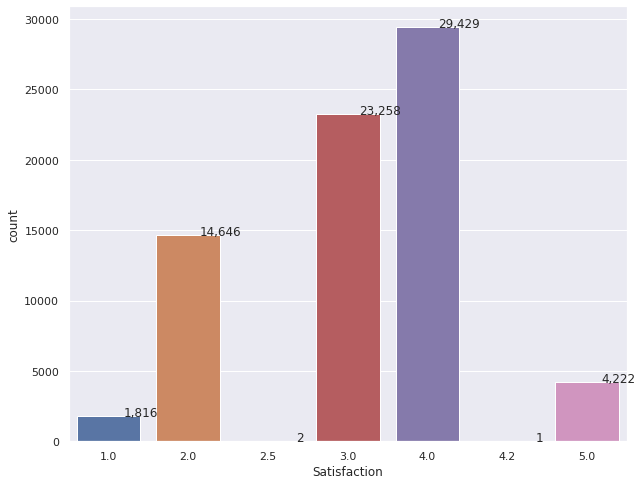

In [32]:
ax = sns.countplot(x = 'Satisfaction', data = flight_female) # for Seaborn version 0.7 and more
total = float(len(flight_female))
for p in ax.patches:
    count = '{:,.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(count, (x, y),ha='center')
plt.show()

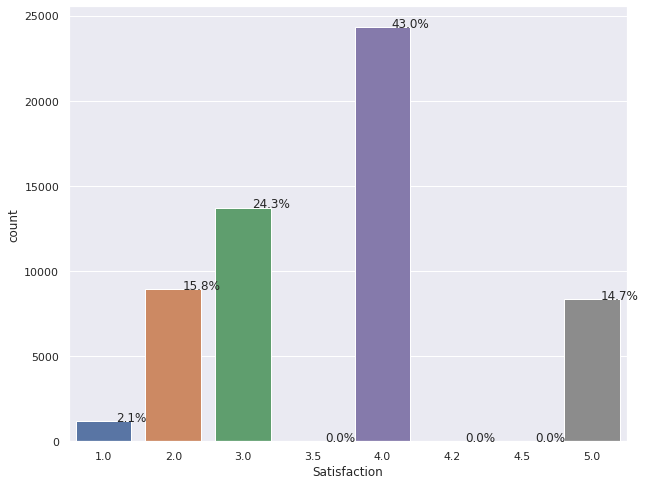

In [33]:
ax = sns.countplot(x = 'Satisfaction', data = flight_male) # for Seaborn version 0.7 and more
total = float(len(flight_male))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

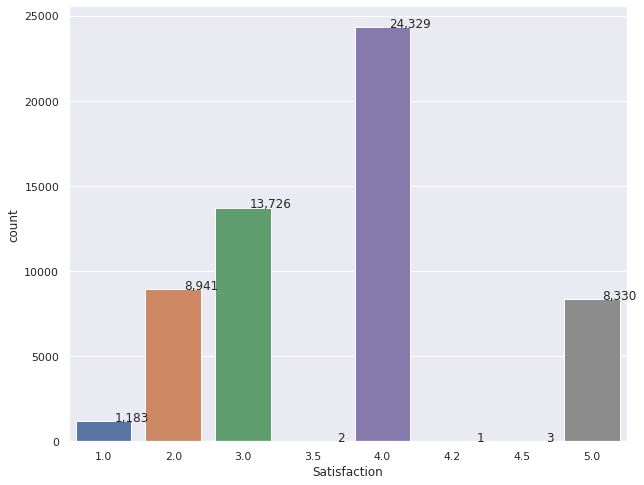

In [34]:
ax = sns.countplot(x = 'Satisfaction', data = flight_male) # for Seaborn version 0.7 and more
total = float(len(flight_male))
for p in ax.patches:
    count = '{:,.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(count, (x, y),ha='center')
plt.show()

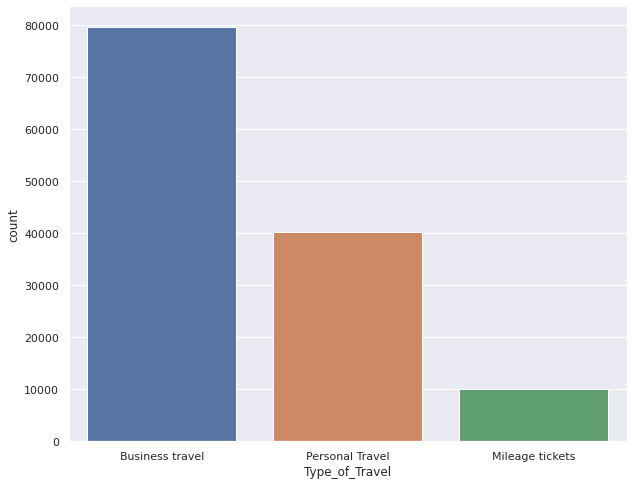

In [35]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(x = 'Type_of_Travel', data = flight1)
plt.show()

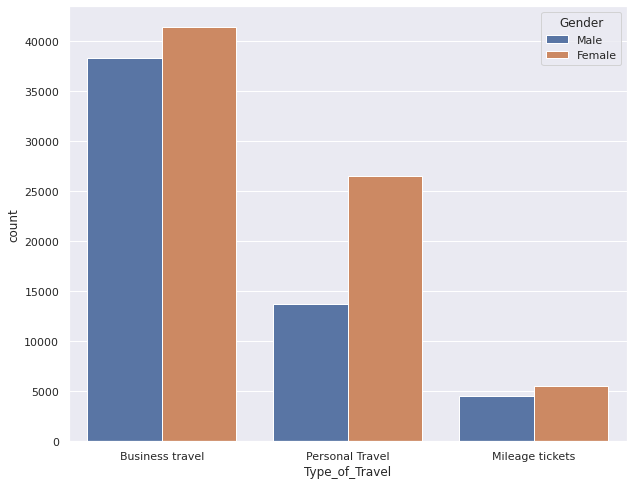

In [36]:
sns.countplot(x = 'Type_of_Travel', hue = 'Gender', data = flight1)
plt.show()

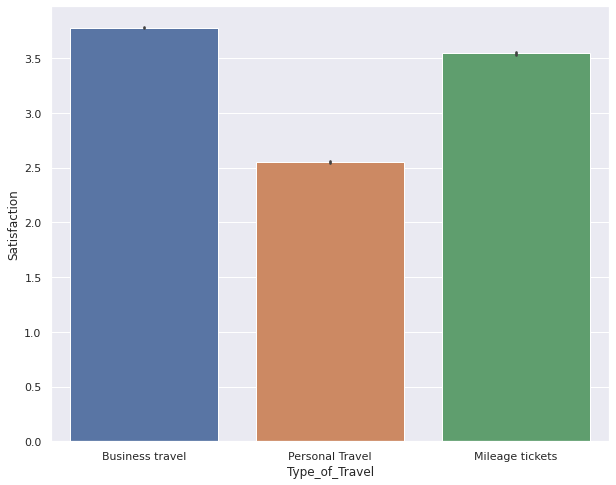

In [37]:
# https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
sns.barplot(x = 'Type_of_Travel', y = 'Satisfaction', data = flight1)
plt.show()

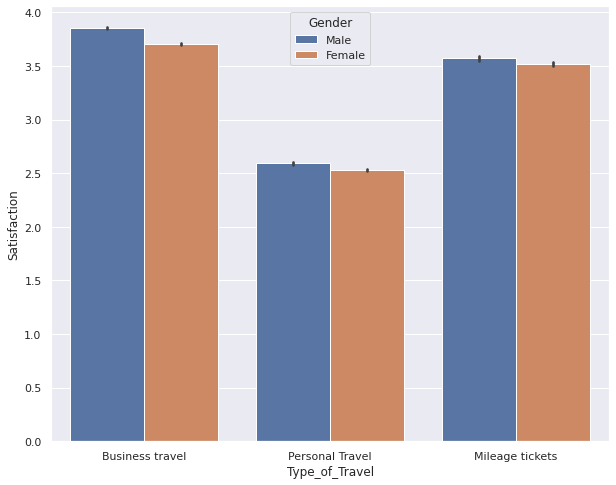

In [38]:
sns.barplot(x = 'Type_of_Travel', y = 'Satisfaction', hue = 'Gender', data = flight1)
plt.show()

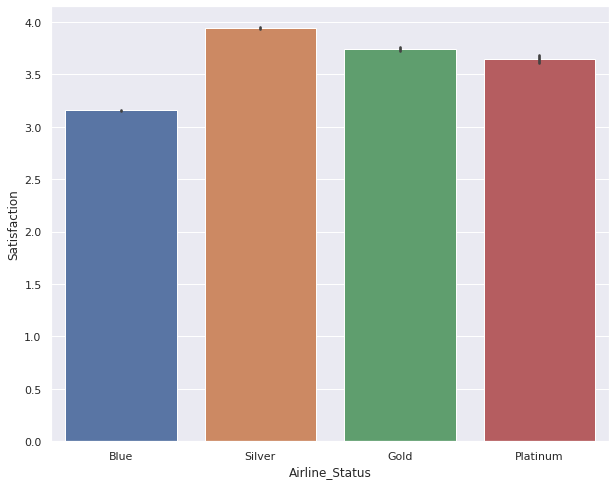

In [39]:
sns.barplot(x = 'Airline_Status', y = 'Satisfaction', data = flight1)
plt.show()

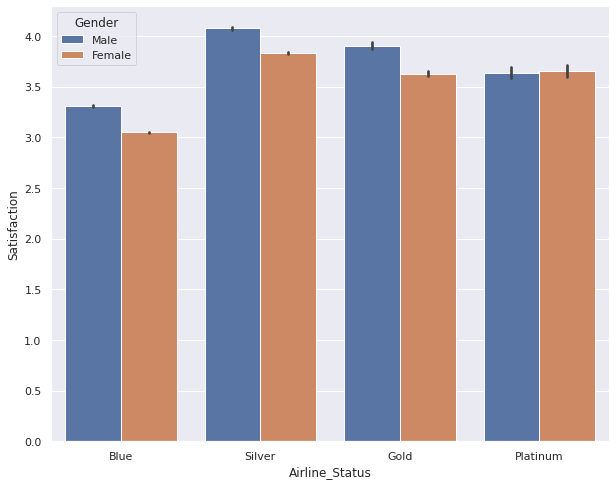

In [40]:
sns.barplot(x = 'Airline_Status', y = 'Satisfaction', hue = 'Gender', data = flight1)
plt.show()

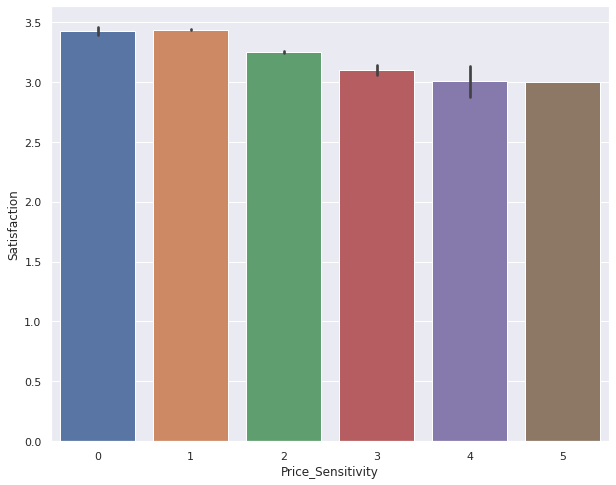

In [41]:
sns.barplot(x = 'Price_Sensitivity', y = 'Satisfaction', data = flight1)
plt.show()

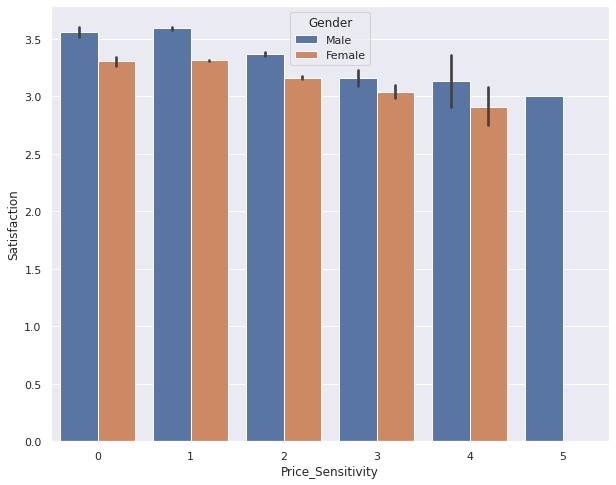

In [42]:
sns.barplot(x = 'Price_Sensitivity', y = 'Satisfaction', hue = 'Gender', data = flight1)
plt.show()

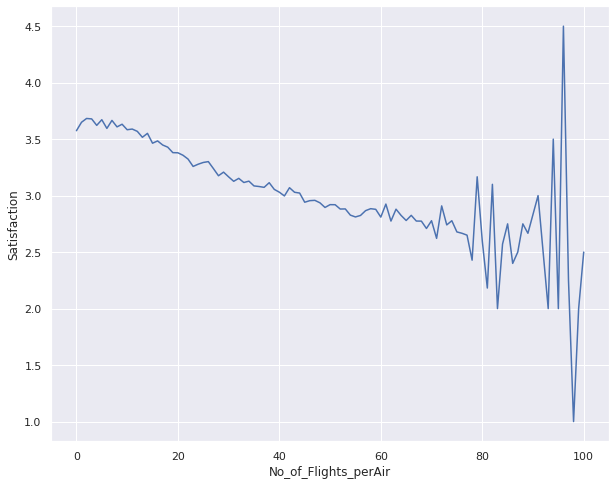

In [43]:
# https://www.geeksforgeeks.org/seaborn-lineplot-method-in-python/?ref=rp
sns.lineplot(x = 'No_of_Flights_perAir', y = 'Satisfaction', ci = None, data = flight1)
plt.show()

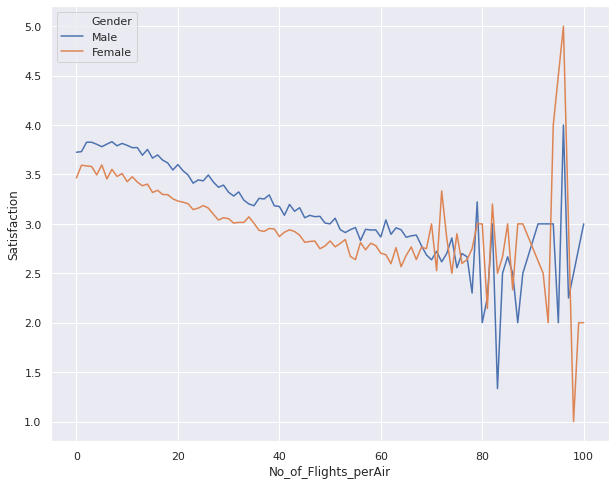

In [44]:
sns.lineplot(x = 'No_of_Flights_perAir', y = 'Satisfaction', hue = 'Gender', ci = None, data = flight1)
plt.show()

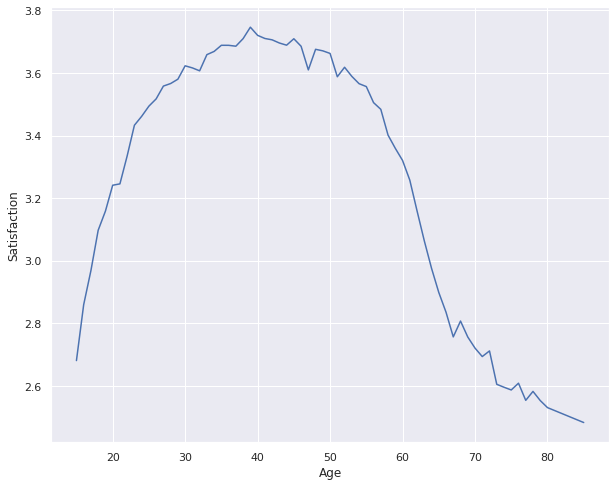

In [45]:
sns.lineplot(x = 'Age', y = 'Satisfaction', ci= None, data = flight1)
plt.show()

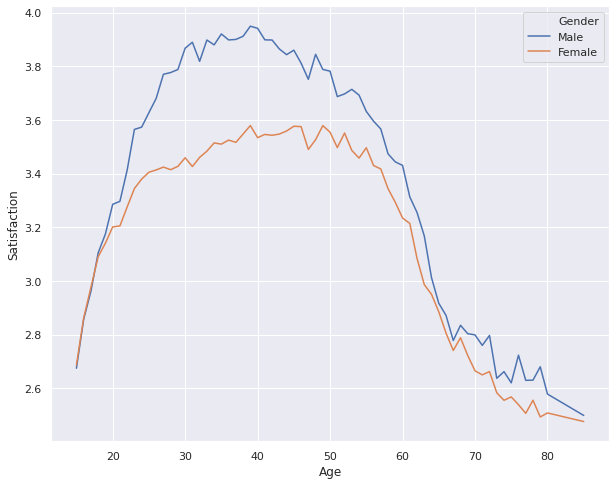

In [46]:
sns.lineplot(x = 'Age', y = 'Satisfaction', hue = 'Gender', ci = None, data = flight1)
plt.show()

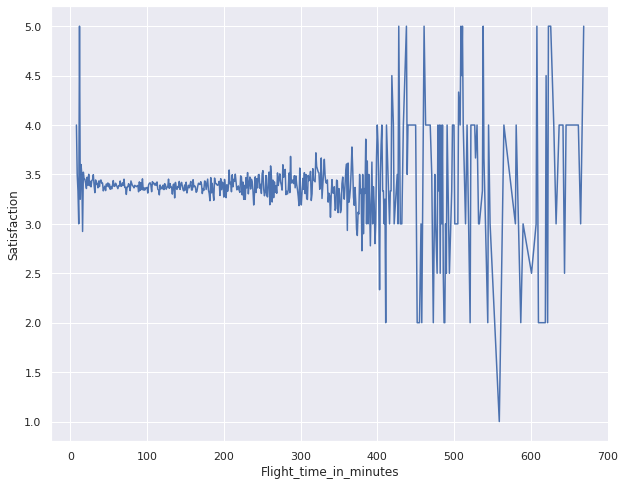

In [47]:
sns.lineplot(x = 'Flight_time_in_minutes', y = 'Satisfaction', ci= None, data = flight1)
plt.show()

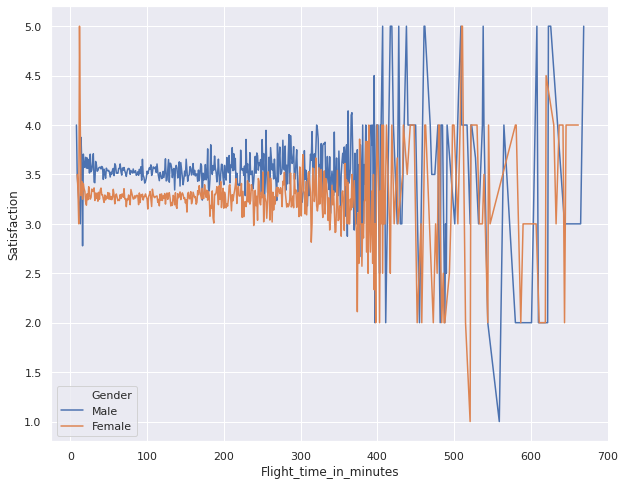

In [48]:
sns.lineplot(x = 'Flight_time_in_minutes', y = 'Satisfaction', hue = 'Gender', ci= None, data = flight1)
plt.show()

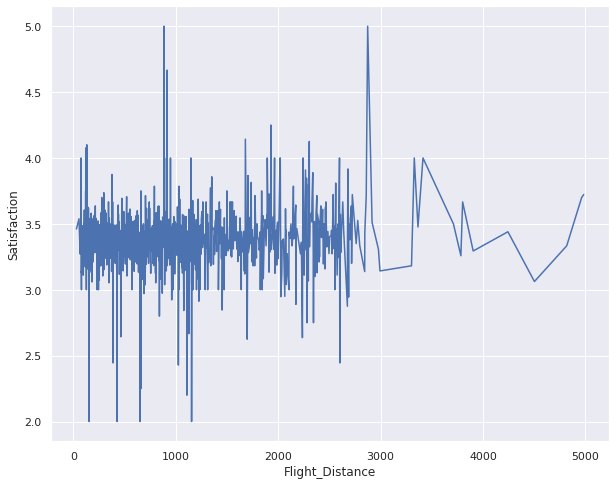

In [49]:
sns.lineplot(x = 'Flight_Distance', y = 'Satisfaction', ci= None, data = flight1)
plt.show()

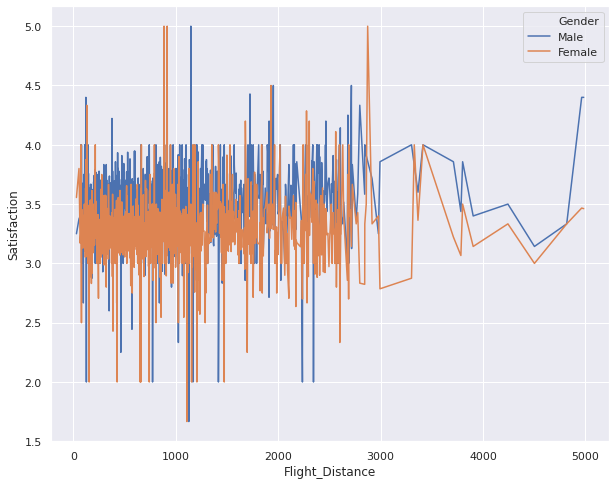

In [50]:
sns.lineplot(x = 'Flight_Distance', y = 'Satisfaction', hue = 'Gender', ci= None, data = flight1)
plt.show()

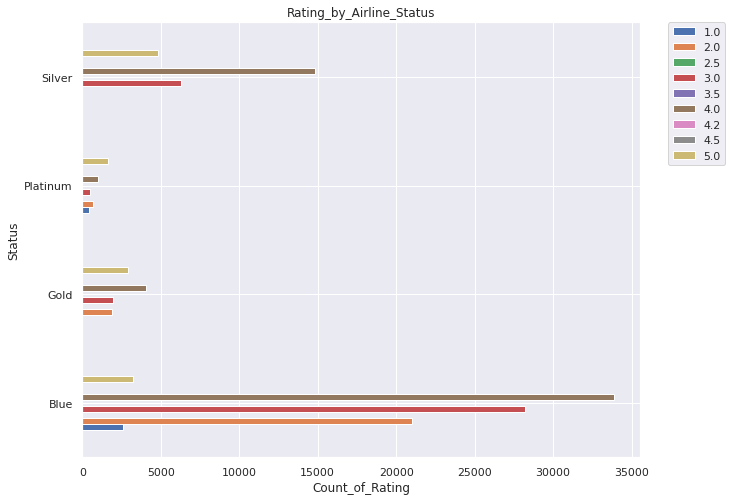

In [51]:
# https://stackoverflow.com/questions/41707992/how-to-refer-to-a-variable-name-with-spaces-in-python
# https://mode.com/example-gallery/python_horizontal_bar/
pd.crosstab(flight1['Airline_Status'], flight1.Satisfaction).plot(kind='barh')
plt.title('Rating_by_Airline_Status')
plt.xlabel('Count_of_Rating')
plt.ylabel('Status')
plt.rcParams['figure.figsize']=(10,8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

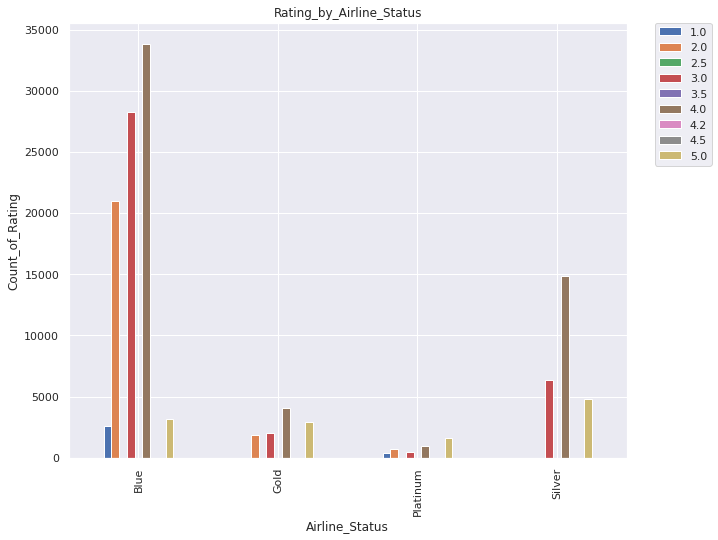

In [52]:
pd.crosstab(flight1['Airline_Status'], flight1.Satisfaction).plot(kind='bar')
plt.title('Rating_by_Airline_Status')
plt.xlabel('Airline_Status')
plt.ylabel('Count_of_Rating')
plt.rcParams['figure.figsize']=(10,8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

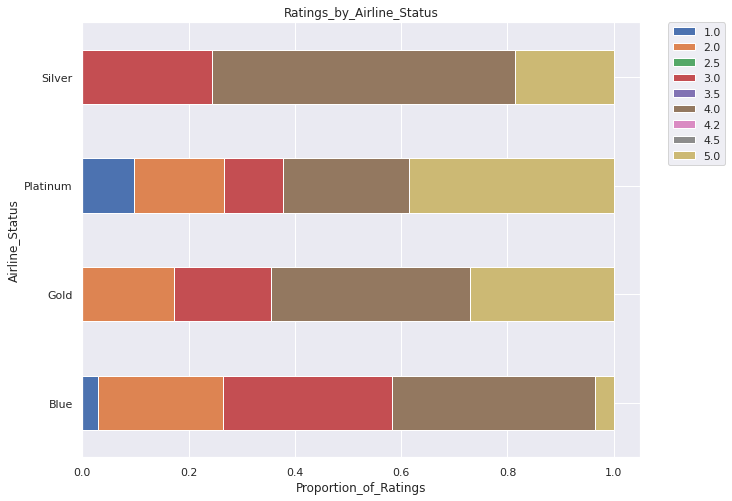

In [53]:
table=pd.crosstab(flight1['Airline_Status'],flight1.Satisfaction)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)
plt.title('Ratings_by_Airline_Status')
plt.xlabel('Proportion_of_Ratings')
plt.ylabel('Airline_Status')
plt.rcParams['figure.figsize']=(10,8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('')

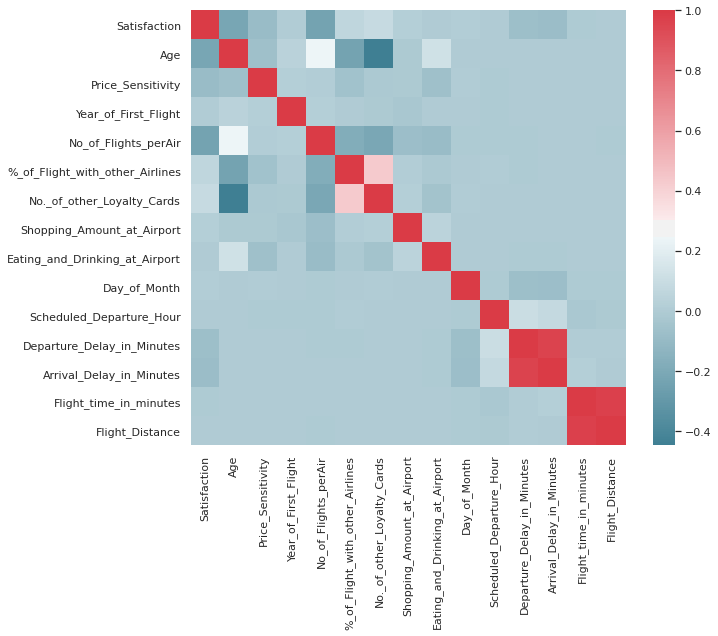

In [54]:
# correlation: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
# run all 4 lines together
f, ax = plt.subplots(figsize=(10, 8))
corr = flight1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


# Linear Regression 1

In [55]:
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
# building the train/test dataset
from sklearn.model_selection import train_test_split

np.random.seed(123)
flight1['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(flight1))
flight1_train = flight1[flight1['runiform'] >= 0.33]
flight1_test = flight1[flight1['runiform'] < 0.33]

In [56]:
print(np.shape(flight1_train))
print(np.shape(flight1_test))

(87108, 29)
(42781, 29)


In [57]:
#flight1.head()

In [58]:
# specify a simple model
my_model_1 = str('Satisfaction ~ Price_Sensitivity + Age + Gender + Type_of_Travel + Airline_Status + Class + No_of_Flights_perAir + Destination_State + Origin_State + Flight_cancelled + Flight_time_in_minutes')

In [59]:
#import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification

# fit the model to the training set
train_model_fit_1 = smf.ols(my_model_1, data = flight1_train).fit()
# summary of model fit to the training set
print(train_model_fit_1.summary())
# training set predictions from the model fit to the training set
flight1_train['predict_satisfaction'] = train_model_fit_1.fittedvalues

# test set predictions from the model fit to the training set
flight1_test['predict_satisfaction'] = train_model_fit_1.predict(flight1_test)
#print(flight1_test)
#print(flight1_train)

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     541.1
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:37   Log-Likelihood:                -94898.
No. Observations:               85267   AIC:                         1.900e+05
Df Residuals:                   85152   BIC:                         1.911e+05
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [60]:
# print(flight1_test)
# print(flight1_train)

# compute the proportion of response variance accounted for when predicting out-of-sample
print('Proportion of Test Set Variance Accounted for: ',    round(np.power(flight1_test['Satisfaction'].corr(flight1_test['predict_satisfaction']),2),3))


Proportion of Test Set Variance Accounted for:  0.418


In [61]:
# use the full data set to obtain an estimate of the increase in Salary for each of the variables
my_model_fit_1 = smf.ols(my_model_1, data = flight1).fit()
flight1['predict_satisfaction'] = my_model_fit_1.predict(flight1)
print(my_model_fit_1.summary())
print(my_model_fit_1.params)

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     806.3
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:46   Log-Likelihood:            -1.4148e+05
No. Observations:              127151   AIC:                         2.832e+05
Df Residuals:                  127036   BIC:                         2.843e+05
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [62]:
print('Proportion of Test Set Variance Accounted for: ',    round(np.power(flight1['Satisfaction'].corr(flight1['predict_satisfaction']),2),3))

Proportion of Test Set Variance Accounted for:  0.42


In [63]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
from sklearn.metrics import mean_squared_error

# https://stackoverflow.com/questions/57118106/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat32
flight1['predict_satisfaction'] = flight1['predict_satisfaction'].fillna(flight1['predict_satisfaction'].mean())

In [64]:
print('The Root Mean Squared Error for Model 1:', mean_squared_error(flight1['Satisfaction'], flight1['predict_satisfaction'],squared=False))

The Root Mean Squared Error for Model 1: 0.7393147791986532


# Linear Regression 2

In [65]:
print(np.shape(flight1_train))
print(np.shape(flight1_test))

(87108, 30)
(42781, 30)


In [66]:
#flight1.head()

In [67]:
# specify a simple model
my_model_2 = str('Satisfaction ~ Price_Sensitivity + Age + Gender + Type_of_Travel + Airline_Status + Class + No_of_Flights_perAir + Flight_cancelled + Flight_time_in_minutes')

In [68]:
# fit the model to the training set
train_model_fit_2 = smf.ols(my_model_2, data = flight1_train).fit()
# summary of model fit to the training set
print(train_model_fit_2.summary())
# training set predictions from the model fit to the training set
flight1_train['predict_satisfaction2'] = train_model_fit_2.fittedvalues

# test set predictions from the model fit to the training set
flight1_test['predict_satisfaction2'] = train_model_fit_2.predict(flight1_test)
#print(flight1_test)
#print(flight1_train)

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     5114.
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:49   Log-Likelihood:                -95011.
No. Observations:               85267   AIC:                         1.900e+05
Df Residuals:                   85254   BIC:                         1.902e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [69]:
# print(flight1_test)
# print(flight1_train)

# compute the proportion of response variance accounted for when predicting out-of-sample
print('Proportion of Test Set Variance Accounted for: ',    round(np.power(flight1_test['Satisfaction'].corr(flight1_test['predict_satisfaction2']),2),3))


Proportion of Test Set Variance Accounted for:  0.419


In [70]:
# use the full data set to obtain an estimate of the increase in Salary for each of the variables
my_model_fit_2 = smf.ols(my_model_2, data = flight1).fit()
flight1['predict_satisfaction2'] = my_model_fit_2.predict(flight1)
print(my_model_fit_2.summary())
print(my_model_fit_2.params)

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     7629.
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:47:53   Log-Likelihood:            -1.4161e+05
No. Observations:              127151   AIC:                         2.833e+05
Df Residuals:                  127138   BIC:                         2.834e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [71]:
print('Proportion of Test Set Variance Accounted for: ',    round(np.power(flight1['Satisfaction'].corr(flight1['predict_satisfaction2']),2),3))

Proportion of Test Set Variance Accounted for:  0.419


In [72]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
from sklearn.metrics import mean_squared_error

# https://stackoverflow.com/questions/57118106/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat32
flight1['predict_satisfaction2'] = flight1['predict_satisfaction2'].fillna(flight1['predict_satisfaction2'].mean())

In [73]:
print('The Root Mean Squared Error for Model 2:', mean_squared_error(flight1['Satisfaction'], flight1['predict_satisfaction2'],squared=False))

The Root Mean Squared Error for Model 2: 0.7400339204068892


# RMSE Results from Linear Regression Models 1 & 2

In [89]:
print('The Root Mean Squared Error for Model 1:', mean_squared_error(flight1['Satisfaction'], flight1['predict_satisfaction'],squared=False))
print('The Root Mean Squared Error for Model 2:', mean_squared_error(flight1['Satisfaction'], flight1['predict_satisfaction2'],squared=False))

The Root Mean Squared Error for Model 1: 0.7393147791986532
The Root Mean Squared Error for Model 2: 0.7400339204068892


# Random Forest 1

In [75]:
# https://stackoverflow.com/questions/44601533/how-to-use-onehotencoder-for-multiple-columns-and-automatically-drop-first-dummy
# need to create dummy data frame to change categorical variables to numeric inputs
flight1_dummied = pd.get_dummies(flight1,drop_first=True)

In [76]:
# https://stackoverflow.com/questions/37366717/pandas-print-column-name-with-missing-values
# finding nas
flight1_dummied.columns[flight1_dummied.isnull().any()]

Index(['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'Flight_time_in_minutes'],
      dtype='object')

In [77]:
# changing all nas to 0 since the measure shows delays/flight time in minutes...these are for the cancelled flights

flight1_dummied['Departure_Delay_in_Minutes'] = flight1_dummied['Departure_Delay_in_Minutes'].fillna(flight1_dummied['Departure_Delay_in_Minutes'] == 0)
flight1_dummied['Arrival_Delay_in_Minutes'] = flight1_dummied['Arrival_Delay_in_Minutes'].fillna(flight1_dummied['Arrival_Delay_in_Minutes'] == 0)
flight1_dummied['Flight_time_in_minutes'] = flight1_dummied['Flight_time_in_minutes'].fillna(flight1_dummied['Flight_time_in_minutes'] == 0)

flight1_dummied.columns[flight1_dummied.isnull().any()]

Index([], dtype='object')

In [78]:
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

flight2_dummied = flight1_dummied.copy()
# Labels are the values we want to predict
labels = np.array(flight2_dummied['Satisfaction'])
# Remove the labels from the flight2_dummied
# axis 1 refers to the columns
flight2_dummied = flight2_dummied.drop('Satisfaction', axis = 1)
# Saving feature names for later use
flight2_dummied_list = list(flight2_dummied.columns)
# Convert to numpy array
flight2_dummied = np.array(flight2_dummied)

In [79]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(flight2_dummied, labels, test_size = 0.33, random_state = 42)

In [80]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (87025, 833)
Training Labels Shape: (87025,)
Testing Features Shape: (42864, 833)
Testing Labels Shape: (42864,)


In [81]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [82]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.52 degrees.


In [84]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy of Random Forest Model #1:', round(accuracy, 1), '%.')

Accuracy of Random Forest Model #1: 80.6 %.


# Random Forest 2

In [85]:
# Instantiate model with 500 decision trees
rf2 = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf2.fit(train_features, train_labels);

In [86]:
# Use the forest's predict method on the test data
predictions2 = rf2.predict(test_features)
# Calculate the absolute errors
errors2 = abs(predictions2 - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors2), 2), 'degrees.')

Mean Absolute Error: 0.52 degrees.


In [87]:
# Calculate mean absolute percentage error (MAPE)
mape2 = 100 * (errors2 / test_labels)
# Calculate and display accuracy
accuracy2 = 100 - np.mean(mape2)
print('Accuracy of Random Forest Model #2:', round(accuracy2, 1), '%.')

Accuracy of Random Forest Model #2: 80.7 %.


# Random Forest Model Results

In [88]:
print('Accuracy of Random Forest Model #1:', round(accuracy, 1), '%.')
print('Accuracy of Random Forest Model #2:', round(accuracy2, 1), '%.')

Accuracy of Random Forest Model #1: 80.6 %.
Accuracy of Random Forest Model #2: 80.7 %.


# Naive Bayes (no output here - ran into issues getting this to run)

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# flight3_dummied = flight1_dummied.copy()

# y = flight3_dummied.Satisfaction # define the target variable (dependent variable) as y

# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#X_train, X_test, y_train, y_test = train_test_split(flight1, y, test_size=0.33, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(flight3_dummied, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize our classifier
# gnb = GaussianNB()

# Train our classifier
# model = gnb.fit(X_train, y_train)

In [ ]:
# Make predictions
# preds = gnb.predict(X_test)
# print(preds)

In [ ]:
# MODEL

# Evaluate accuracy
# Bayes_score = accuracy_score(y_test, preds)
# print(Bayes_score)

In [ ]:
# INTERPRET

# expected = y_test
# predicted = preds
# print(sklearn.metrics.confusion_matrix(expected, predicted))

In [ ]:
# full_pred = gnb.predict(flight3_dummied)
# accuracy_score(flight3_dummied, full_pred)

# SVM (no output here - base of what i was looking to run)

In [11]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.compose import ColumnTransformer, make_column_transformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn import preprocessing
# from sklearn.svm import SVR

In [12]:
# flight4_dummied = flight1_dummied.copy()

# y = flight4_dummied.Satisfaction # define the target variable (dependent variable) as y

# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# X_train, X_test, y_train, y_test = train_test_split(flight4_dummied, y, test_size=0.3, random_state=42)

In [13]:
# Initialize our classifier
# svreg = SVR(kernel = 'rbf')

In [14]:
# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# Train our classifier
# model = svreg.fit(X_train, y_train)

In [15]:
# Make predictions
# preds = svreg.predict(X_test)
# print(preds)

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, preds))
# print(classification_report(y_test,preds))